In [3]:
from visFeatures import *
import matplotlib.pyplot as plt

In [4]:
label = get_label_map()

In [5]:
label

{'1217181955': 2,
 '1370095225': 2,
 '1491644455': 2,
 '1763553497': 2,
 '1633680252': 2,
 '1641360963': 2,
 '4624752731': 2,
 '5261949102': 2,
 '5263230337': 2,
 '5265794702': 2,
 '5270278431': 2,
 '5274763566': 2,
 '5389896077': 2,
 '5390539325': 2,
 '4999611670': 2,
 '5927278788': 2,
 '5927918246': 2,
 '5927916921': 2,
 '6058427991': 2,
 '5787168998': 2,
 '6437819151': 2,
 '964497480': 2,
 '964498611': 2,
 '965777043': 2,
 '1224884860': 2,
 '5013681688': 2,
 '5533813798': 2,
 '5794846251': 2,
 '5925996378': 2,
 '6055867559': 2,
 '6186380055': 2,
 '6177427050': 2}

In [9]:
with open('test.txt', 'w') as f:
    for k in label.keys():    
        f.write('cluster3_'+str(k)+'\n')

In [2]:
filename = './train_features.json'
image_path = './features1.png'

feat, cls, key = load_data(filename)

In [3]:
d = similarity(feat, cls, key)

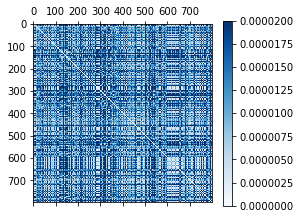

In [4]:
plt.matshow(d,cmap=plt.cm.Blues,vmin=0,vmax=0.00002)
plt.axis('on') # 刻度尺
plt.colorbar(shrink=0.83)
plt.show()

In [5]:
b = np.argsort(d, axis=None)
idx = np.unravel_index(b, d.shape)
x, y = idx[0], idx[1]
def printIndexAndKey(i):
    print("Index: {}, {}".format(x[i], y[i]))
    print("Key: {}, {}".format(key[x[i]], key[y[i]]))
    print("Class: {}, {}".format(cls[x[i]], cls[y[i]]))
    print("Distance: {}".format(d[x[i]][y[i]]))

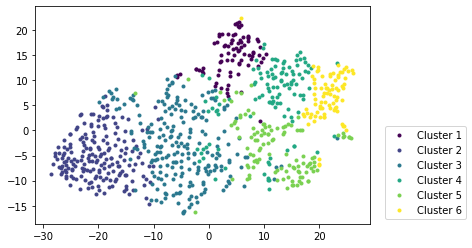

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

cluster_num = 6
X = pd.DataFrame(feat)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=cluster_num,random_state=0)
kmeans.fit(X)

labels = kmeans.labels_
labels = pd.DataFrame(labels,columns=['labels'])

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0, perplexity=50)
a = tsne.fit_transform(X)
X.insert(0,'labels',labels)
liris = pd.DataFrame(a,index=X.index)
liris.insert(2,'key',key)
liris.insert(3,'labels',labels)

color = plt.cm.viridis(np.linspace(0,1,cluster_num))
marker = markers=["D","x","h",".","^",">","v","*","o","s","3"]

for i in range(cluster_num):
    di = liris[X['labels']==i]
    plt.scatter(di[0],di[1],color=color[i],marker='.',label='Cluster {}'.format(i+1))
# plt.plot(d1[0],d1[1],'r.',d2[0],d2[1],'go',d3[0],d3[1],'b*', d4[0],d4[1],'y*', d5[0],d5[1],'kh', d6[0],d6[1],'ch', d7[0],d7[1],'mh', d8[0],d8[1],'wh', d9[0],d9[1],'gh', d10[0],d10[1],'ch')
plt.legend(loc = 4,bbox_to_anchor=(1.3, 0))#图例
plt.savefig('./unsupervised2.png', format='png',dpi=300, bbox_inches='tight')

In [7]:
liris.to_csv('pos_key.csv')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


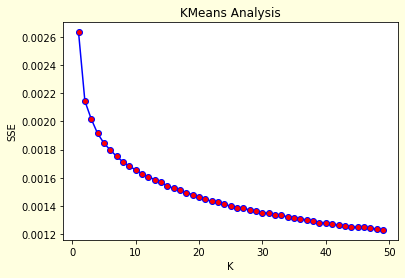

<Figure size 432x288 with 0 Axes>

In [8]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

meanDispersions = []
Ks = range(1, 50)
X = feat
# 为不同的超参数拟合模型
for k in Ks:
    km = KMeans(n_clusters=k,
               init='k-means++',
               n_init=10,
               max_iter=300,
               n_jobs=-1,
               random_state=0)
    
    km.fit(X)
    meanDispersions.append(sum(
            np.min(cdist(X, km.cluster_centers_, 'euclidean'), axis=1))/X.shape[0]) # 保存不同超参数对应模型的聚类偏差

plt.rcParams['font.sans-serif'] = 'SimHei'   
plt.figure('百里希文', facecolor='lightyellow')

# 绘制不同超参 K 对应的离差平方和折线图
plt.plot(Ks, meanDispersions,'bo-', mfc='r')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('KMeans Analysis')

plt.show()
plt.savefig('./kmeans-K.png', format='png',dpi=300, bbox_inches='tight')

In [9]:
max_min_scaler = lambda x: (x-np.min(x))/(np.max(x)-np.min(x))
d = liris[[0]].apply(max_min_scaler)
liris = liris.drop(0, axis=1)
liris[0] = d

In [10]:
liris.to_csv('pos_key.csv')

In [11]:
liris

,1,key,labels,0
0,-14.624026,12447040740,2,0.461830
1,9.418755,7121667667,5,0.871102
2,6.550908,9580327249,2,0.535074
3,-8.086157,2919066156,2,0.525394
4,2.963317,3968141413,1,0.160233
5,11.541984,9053266488,5,0.960966
6,-9.724138,6736028028,1,0.313089
7,3.225087,7212584868,5,0.903225
8,2.642769,2657225570,1,0.180535
9,3.121504,11665212064,1,0.096436


In [12]:
data = pd.read_csv('./pos_key.csv')

In [13]:
for i in zip(data['0'], data['1'], data['key'], data['labels']):
    x, y, key, labels = i
    print(labels)

2
5
2
2
1
5
1
5
1
1
5
1
2
1
1
2
2
1
1
5
4
5
0
1
2
2
3
1
4
4
4
1
0
3
5
5
2
2
2
1
5
0
4
4
0
2
0
1
3
4
2
1
2
2
2
3
5
1
1
2
1
5
2
5
0
5
4
4
2
2
3
3
1
1
3
3
5
2
3
1
1
2
1
1
5
4
2
2
3
2
2
2
0
0
4
4
4
1
2
5
2
1
5
3
4
4
0
4
3
1
0
3
2
1
5
0
4
1
3
5
4
0
5
1
1
2
2
3
4
5
3
0
4
2
2
4
0
2
1
4
3
0
5
0
3
5
3
3
3
0
1
2
2
2
0
5
2
2
2
4
2
0
3
0
4
1
5
2
2
4
0
2
0
1
1
2
3
3
4
2
4
1
5
1
1
2
0
2
1
4
4
1
3
2
5
0
1
3
2
2
5
4
2
3
1
2
3
1
3
2
1
5
5
2
2
2
4
3
1
5
0
3
2
2
5
2
1
2
1
0
2
2
5
1
4
2
0
4
1
2
3
1
0
1
4
2
2
2
3
2
2
1
1
3
3
0
0
0
4
1
1
1
1
1
2
4
4
5
1
1
1
2
0
3
2
2
3
3
3
5
0
5
1
1
2
3
2
1
1
0
4
2
1
4
2
4
2
1
1
3
1
5
5
1
1
1
5
1
5
3
1
2
2
1
5
4
2
3
5
4
4
4
3
2
4
1
1
0
2
1
0
0
5
1
2
3
4
1
5
0
2
1
0
1
3
1
0
0
4
5
4
2
4
3
0
3
0
1
4
5
1
1
1
1
3
2
0
1
0
1
2
2
2
4
4
2
1
2
1
3
5
3
4
2
4
0
1
2
1
3
2
3
2
2
0
1
4
4
4
2
2
2
4
1
4
2
2
2
2
2
4
2
3
5
5
1
1
1
1
3
2
3
3
1
3
2
2
2
0
1
1
2
5
4
5
2
4
2
2
1
5
5
3
5
2
2
3
2
3
3
2
5
0
2
0
3
1
0
2
4
2
0
3
1
1
2
0
1
2
1
2
1
2
3
3
1
0
2
4
2
2
3
5
3
3
5
1
0
4
3
3
2
2
1
1
2
3
4
2
2
